In [1]:
import os
import seaborn as sns

In [2]:
FILENAME = "side_effect_data.xlsx"
DATASET_PATH = os.path.join("dataset", FILENAME)

In [3]:
import pandas as pd

data = pd.read_excel(DATASET_PATH)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [5]:
column_maps = {"Kullanici_id":"user_id", "Cinsiyet":"gender", "Dogum_Tarihi":"birthdate", "Uyruk":"origin", "Il": "city", "Ilac_Adi":"drug_name","Ilac_Baslangic_Tarihi":"drug_start_date",
               "Ilac_Bitis_Tarihi":"drug_end_date","Yan_Etki":"side_effect", "Yan_Etki_Bildirim_Tarihi":"side_effect_notif_date", "Alerjilerim":"allergies", "Kronik Hastaliklarim": "chronic_diseases",
               "Baba Kronik Hastaliklari":"father_chronic_diseases", "Anne Kronik Hastaliklari":"mother_chronic_diseases","Kiz Kardes Kronik Hastaliklari":"sister_chronic_diseases",
               "Erkek Kardes Kronik Hastaliklari":"brother_chronic_diseases", "Kan Grubu":"blood_type", "Kilo":"weight", "Boy":"height"}

data = data.rename(columns=column_maps)

In [6]:
data.head()

,user_id,gender,birthdate,origin,city,drug_name,drug_start_date,drug_end_date,side_effect,side_effect_notif_date,allergies,chronic_diseases,father_chronic_diseases,mother_chronic_diseases,sister_chronic_diseases,brother_chronic_diseases,blood_type,weight,height
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [7]:
user_data = data.iloc[data["user_id"].drop_duplicates().index, :]

In [8]:
data = data.astype({"user_id":"object"})
data["birth_year"] = pd.to_datetime(data["birthdate"]).dt.year
data["age_group"] = pd.cut(data["birth_year"],
 bins=[1930, 1960, 1980, 2000, 2010, 2040],
 labels=[1, 2, 3, 4, 5])
data["age"] = 2024 - data["birth_year"].astype(int)
data["bmi"] = (data["weight"] / data["height"]**2) * 10e3

In [9]:
data.describe()

,weight,height,birth_year,age,bmi
count,2064.000000,2243.000000,2357.000000,2357.000000,1950.000000
mean,80.863857,174.638431,1974.409419,49.590581,27.572163
std,18.635269,16.516552,20.076783,20.076783,8.822664
min,50.000000,145.000000,1939.000000,13.000000,12.623450
25%,65.000000,160.000000,1959.000000,32.000000,20.756387
50%,83.000000,176.000000,1973.000000,51.000000,26.709402
75%,96.000000,187.000000,1992.000000,65.000000,32.912013
max,110.000000,203.000000,2011.000000,85.000000,49.979175


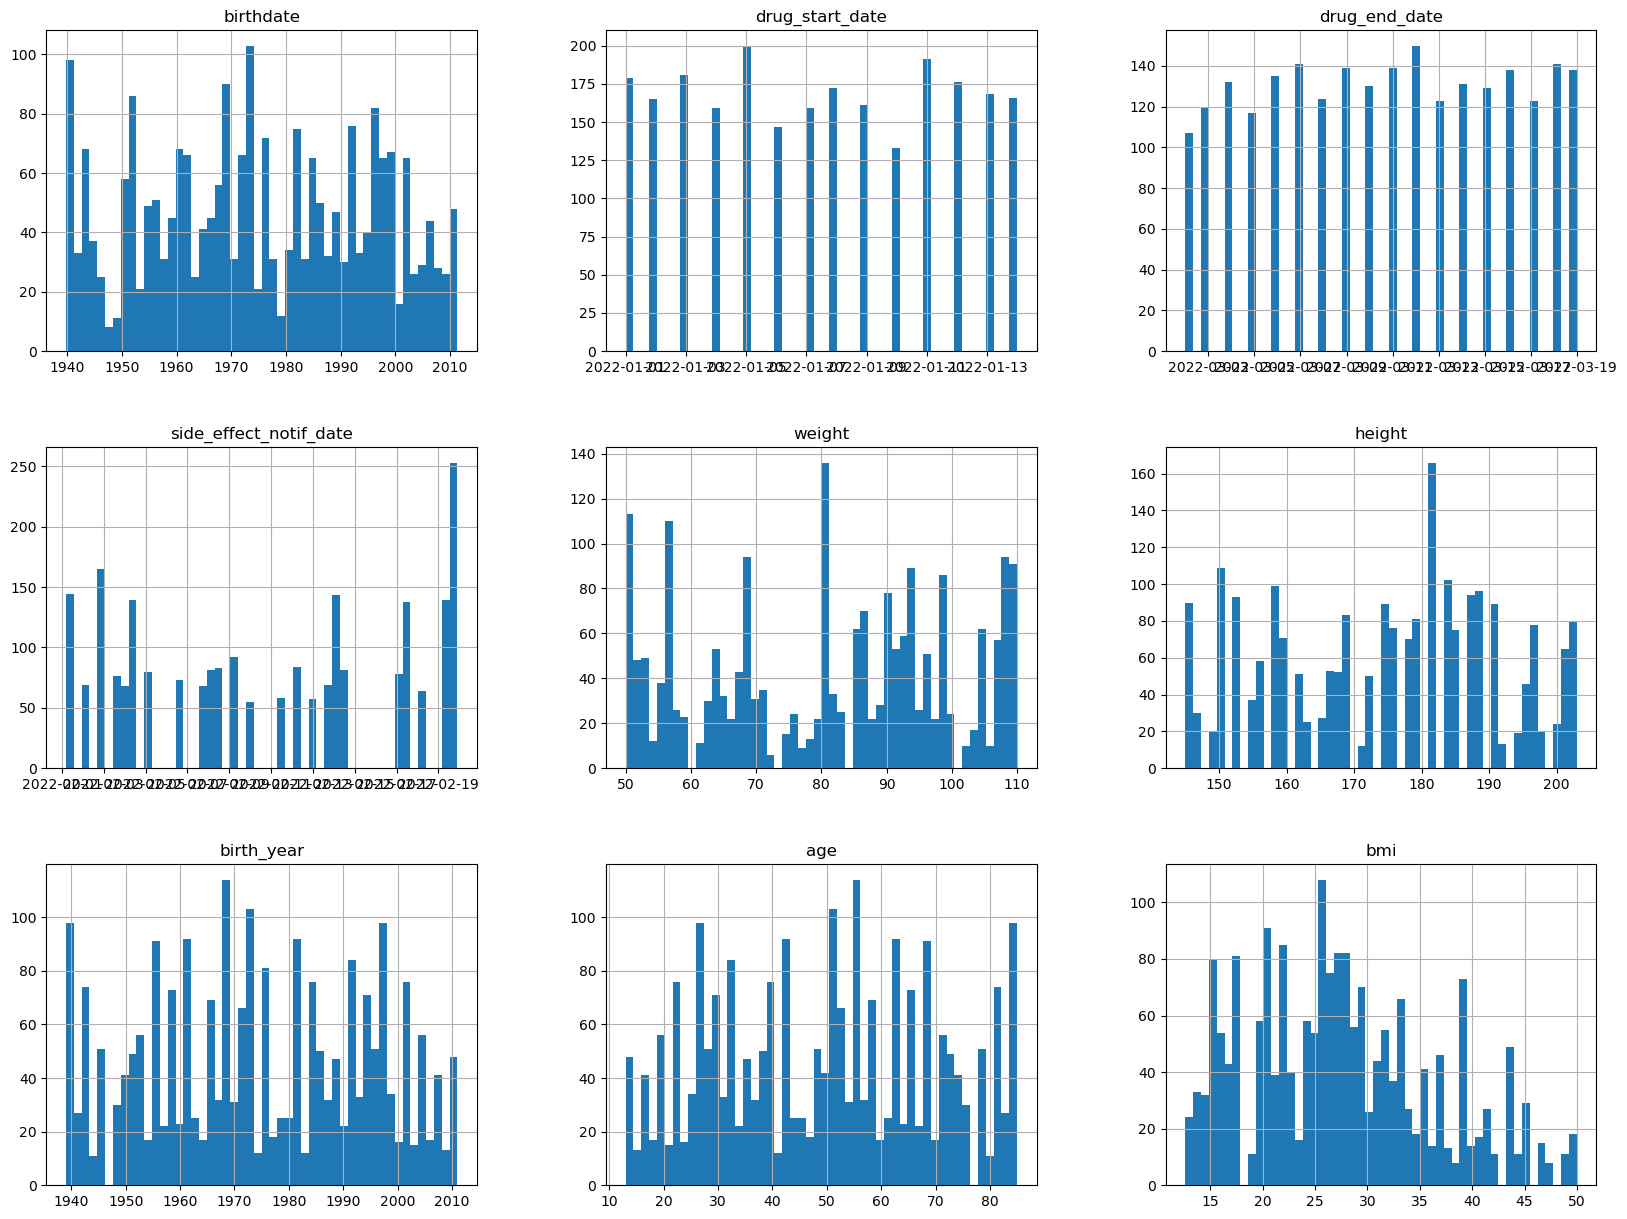

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

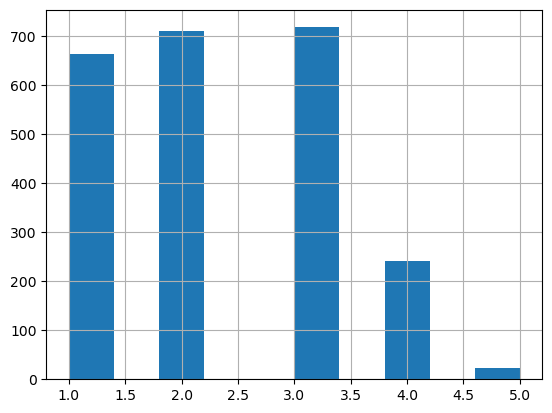

In [11]:
data["age_group"].hist()

C:\Users\sceli\AppData\Local\Temp\ipykernel_4828\751783092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data.corr()


,weight,height,birth_year,age,bmi
weight,1.000000,-0.149016,-0.026321,0.026321,0.798079
height,-0.149016,1.000000,0.002952,-0.002952,-0.692869
birth_year,-0.026321,0.002952,1.000000,-1.000000,-0.055783
age,0.026321,-0.002952,-1.000000,1.000000,0.055783
bmi,0.798079,-0.692869,-0.055783,0.055783,1.000000


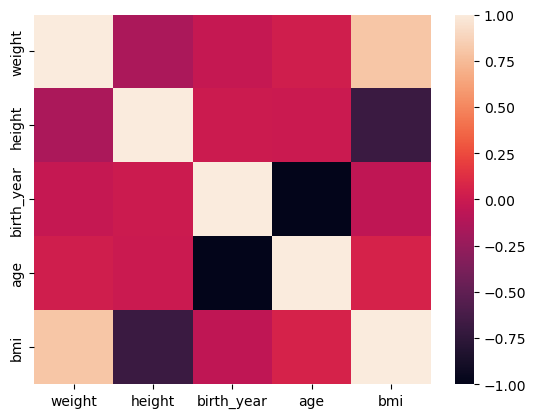

In [12]:
corr_mat = data.corr()
display(corr_mat)
sns.heatmap(corr_mat)
plt.show()

### Sklearn Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)


### Stratified Split

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["age_group"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]


#### Normal test set vs Stratfied test set age_group class ratio 1(-1930) to 5(2010-) 

In [15]:
strat_test_set["age_group"].value_counts() / len(strat_test_set)

3    0.305085
2    0.300847
1    0.281780
4    0.101695
5    0.010593
Name: age_group, dtype: float64

In [16]:
test_set["age_group"].value_counts() /len(test_set)

2    0.305085
3    0.302966
1    0.292373
4    0.086864
5    0.012712
Name: age_group, dtype: float64

In [17]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("age_group", axis=1, inplace=True)


## Traininig Data

In [18]:
df_train = strat_train_set.copy()
df_train.head()

,user_id,gender,birthdate,origin,city,drug_name,drug_start_date,drug_end_date,side_effect,side_effect_notif_date,...,father_chronic_diseases,mother_chronic_diseases,sister_chronic_diseases,brother_chronic_diseases,blood_type,weight,height,birth_year,age,bmi
454,17,Male,1969-07-26,Turkiye,Eskisehir,olanzapine odt,2022-01-12,2022-03-16,Tansiyon Dusuklugu,2022-02-14 03:35:01,...,"Astim, Hipertansiyon",,Hipertansiyon,Astim,0 RH-,91.0,145.0,1969,55,43.281807
2049,56,NaN,1998-10-04,Turkiye,Mersin,desonide lotion,2022-01-08,2022-03-05,Agizda Farkli Bir Tat,2022-02-12 05:33:06,...,Kanser,"Kemik Erimesi, Diyabet","Kalp Hastaliklari, Diger","Diyabet, Kan Hastaliklari",AB RH+,59.0,191.0,1998,26,16.172802
1342,41,Female,1956-10-09,Turkiye,Eskisehir,dipyridamole,2022-01-09,2022-03-16,Gec Bosalma,2022-02-14 07:26:11,...,NaN,"Alzheimer, Hipertansiyon","Hipertansiyon, Alzheimer","Hipertansiyon, Kemik Erimesi",B RH+,51.0,182.0,1956,68,15.396691
616,71,Male,1979-08-18,Turkiye,Canakkale,chlordiazepoxide-amitriptyline,2022-01-03,2022-03-09,Karin Agrisi,2022-02-13 13:55:37,...,Kanser,"Kalp Hastaliklari, Diger","Kanser, Astim","Guatr, Kanser",B RH+,94.0,197.0,1979,45,24.221186
861,118,Male,1946-05-10,Turkiye,Izmir,triamcinolone cream,2022-01-14,2022-03-10,Gormede Bulaniklik,2022-02-16 22:10:35,...,"Kalp Hastaliklari, KOAH","Kanser, Guatr","Diyabet, Kanser","KOAH, Kalp Hastaliklari",NaN,85.0,181.0,1946,78,25.945484


## Missing Values

In [19]:
def null_values(df):
    print(df.isnull().sum().sort_values(ascending=False))

null_values(data)

gender                      778
allergies                   484
bmi                         407
chronic_diseases            392
blood_type                  347
weight                      293
city                        227
mother_chronic_diseases     217
father_chronic_diseases     156
brother_chronic_diseases    121
height                      114
sister_chronic_diseases      97
side_effect                   0
side_effect_notif_date        0
origin                        0
birthdate                     0
drug_name                     0
drug_end_date                 0
drug_start_date               0
birth_year                    0
age_group                     0
age                           0
user_id                       0
dtype: int64


In [20]:
def empty_imputer(df, missing_column):
    df.loc[df[missing_column].isnull(), [missing_column]] = "Yok"
    return df

In [21]:
# Boy ve kilo için doldurma yapma
def imputer_missing_values(df, missing_column, target_column, th):
    for index, row in df[df[missing_column].isnull()].iterrows():
        sample = df.loc[(df[target_column] >= row[target_column] - th) & (df[target_column] <= row[target_column] + th), :]
        if row["gender"] is not np.NaN:
            sample = sample.loc[sample["gender"] == row["gender"],:] # same gender
        df.loc[index, [missing_column]] = sample[missing_column].dropna().values.mean()
    return df

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
# gender
df_train = empty_imputer(df_train, "gender")
# allergies
df_train = empty_imputer(df_train, "allergies")
# chronic diseases
missing_diseases = ["chronic_diseases", "mother_chronic_diseases","father_chronic_diseases", "brother_chronic_diseases", "sister_chronic_diseases"]
for dis in missing_diseases:
    df_train = empty_imputer(df_train, dis)
# height
df_train = imputer_missing_values(df_train, "height", "weight", 5)
# weight
df_train = imputer_missing_values(df_train, "weight", "height", 10)


In [24]:
df_train["bmi"] = (df_train["weight"] / df_train["height"]**2) * 10e3
null_values(df_train)

blood_type                  273
city                        180
user_id                       0
father_chronic_diseases       0
age                           0
birth_year                    0
height                        0
weight                        0
brother_chronic_diseases      0
sister_chronic_diseases       0
mother_chronic_diseases       0
chronic_diseases              0
gender                        0
allergies                     0
side_effect_notif_date        0
side_effect                   0
drug_end_date                 0
drug_start_date               0
drug_name                     0
origin                        0
birthdate                     0
bmi                           0
dtype: int64


In [25]:
def split_disease_column(df, column_name):
    df[column_name] = df[column_name].apply(lambda row: row.split(','))
    df[[column_name+"_1", column_name+"_2"]] = pd.DataFrame(df[column_name].tolist(), index=df.index)
    df = empty_imputer(df, column_name+"_2")
    return df.drop([column_name], axis=1)

In [26]:
for disease in missing_diseases:
    df_train = split_disease_column(df_train, disease)

In [27]:
df_train.columns

Index(['user_id', 'gender', 'birthdate', 'origin', 'city', 'drug_name',
       'drug_start_date', 'drug_end_date', 'side_effect',
       'side_effect_notif_date', 'allergies', 'blood_type', 'weight', 'height',
       'birth_year', 'age', 'bmi', 'chronic_diseases_1', 'chronic_diseases_2',
       'mother_chronic_diseases_1', 'mother_chronic_diseases_2',
       'father_chronic_diseases_1', 'father_chronic_diseases_2',
       'brother_chronic_diseases_1', 'brother_chronic_diseases_2',
       'sister_chronic_diseases_1', 'sister_chronic_diseases_2'],
      dtype='object')

In [28]:
num_attrs = ["weight", "height", "birth_year", "age", "bmi"]
ord_cat_attrs = ["side_effect_notif_date"]
nom_cat_attrs = ["user_id", "gender","city", "drug_name", "side_effect", "allergies", "chronic_diseases_1", "chronic_diseases_2", "father_chronic_diseases_1","father_chronic_diseases_2", 
                 "mother_chronic_diseases_1","mother_chronic_diseases_2", "sister_chronic_diseases_1","sister_chronic_diseases_2", "brother_chronic_diseases_1","brother_chronic_diseases_2", "blood_type"]
len(num_attrs) + len(ord_cat_attrs) + len(nom_cat_attrs), len(df_train.columns)

(23, 27)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attrs),
 ("nom_cat", OneHotEncoder(), nom_cat_attrs),
 ])

df_train_prepared = full_pipeline.fit_transform(df_train)

In [35]:
 df_train["drug_end_date"] - df_train["drug_start_date"]

454    63 days
2049   56 days
1342   66 days
616    65 days
861    55 days
         ...  
506    65 days
999    71 days
333    73 days
295    63 days
1793   66 days
Length: 1885, dtype: timedelta64[ns]

In [32]:
df_train_prepared.shape

(1885, 552)

In [539]:
df_train_prepared.toarray().shape

(1885, 552)

In [523]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, 

ord_enc = OneHotEncoder()
nom_cat_attrs = ["sister_chronic_diseases_2"]
# drug_name sıkıntı, chronin diseases 1 ve 2 diye ayır
df_train_cat = df_train[nom_cat_attrs]

encoded = ord_enc.fit_transform(df_train_cat)
encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Outliers

In [23]:
def plot_IQR(df, col_name):
    df.plot.box(column=col_name, by="gender", figsize=(10,8))
    plt.show()

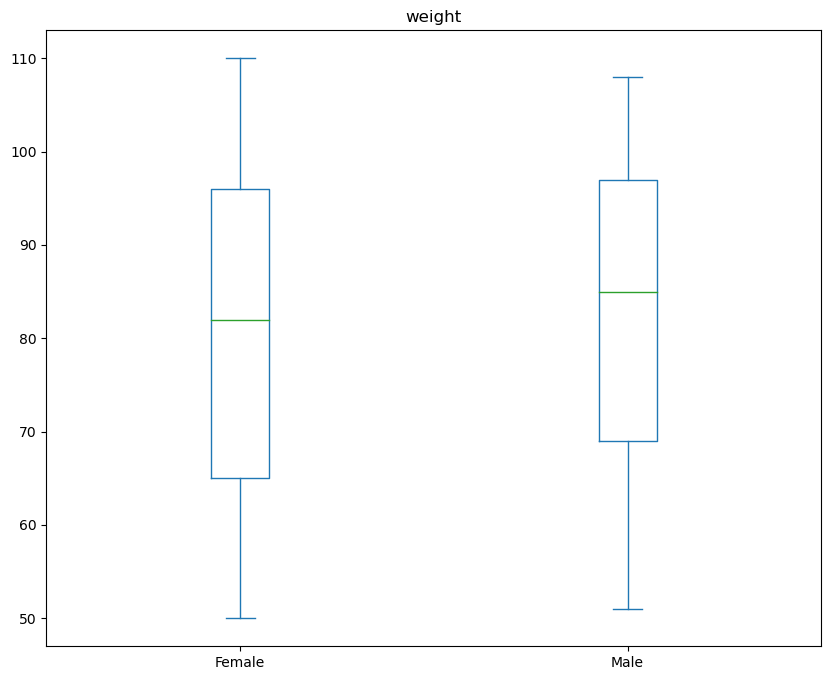

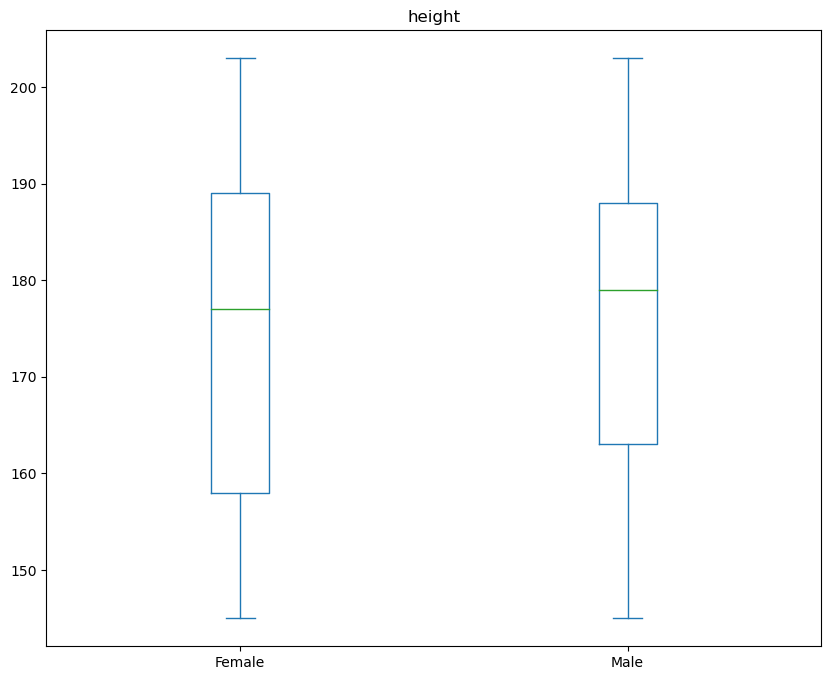

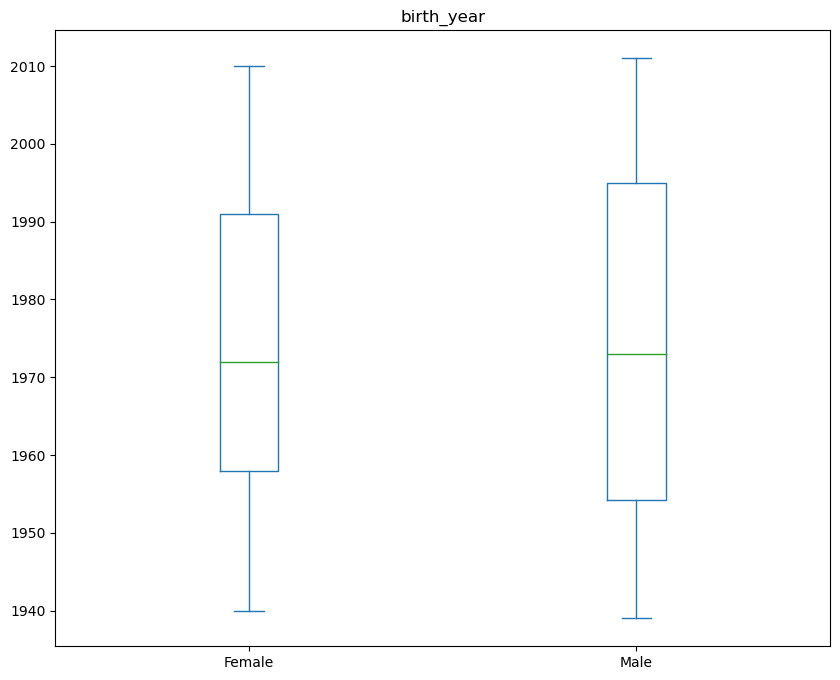

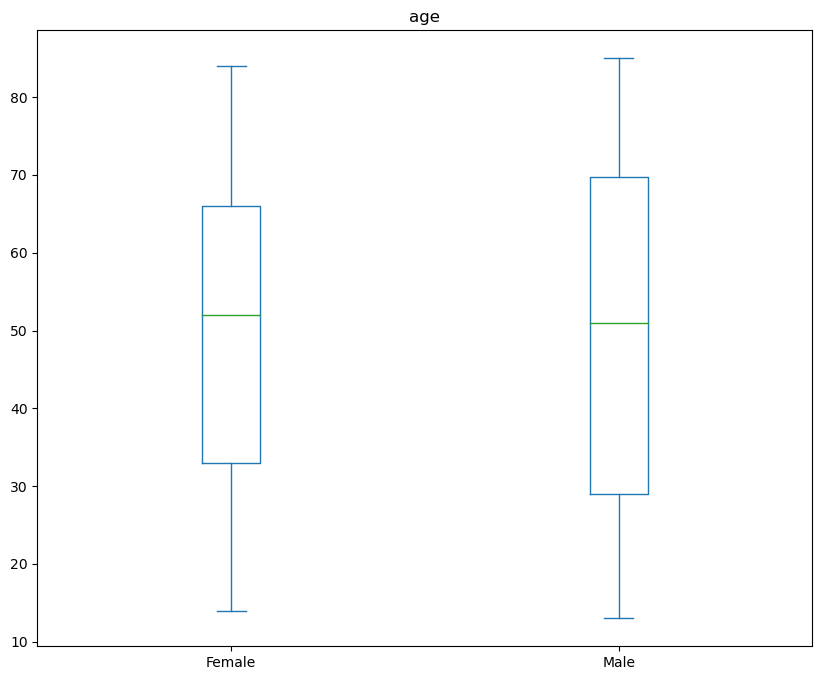

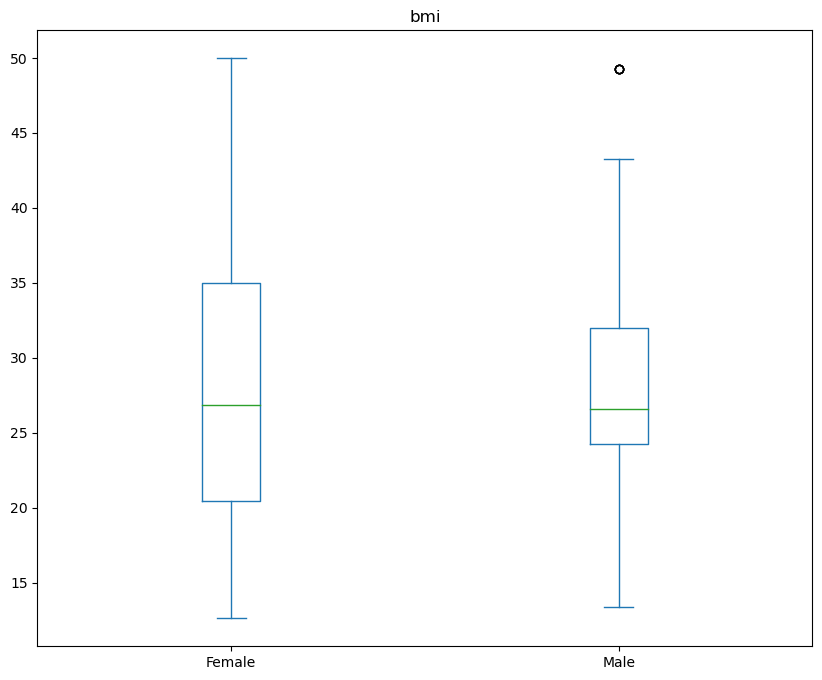

In [24]:
for col in num_attrs:
    plot_IQR(df_train,col)

In [51]:
def outlier_detect(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1*IQR
    upper = Q3 + 1*IQR
    print('Before data preprocess:')
    print('Skewness:', df.skew())
    print(df.describe())
    print('Median:\n', df.median())
    print('IQR:\n', IQR)
    print("Lower - Uppeer bound", lower,'-',upper)

In [52]:
outlier_detect(df_train[num_attrs])

Before data preprocess:
Skewness: weight       -0.115116
height       -0.126046
birth_year   -0.021427
age           0.021427
bmi           0.440620
dtype: float64
            weight       height   birth_year          age          bmi
count  1645.000000  1801.000000  1885.000000  1885.000000  1561.000000
mean     80.817021   174.688506  1974.536340    49.463660    27.508416
std      18.772325    16.428435    20.012904    20.012904     8.851771
min      50.000000   145.000000  1939.000000    13.000000    12.623450
25%      65.000000   160.000000  1959.000000    32.000000    20.626562
50%      82.000000   178.000000  1973.000000    51.000000    26.709402
75%      96.000000   187.000000  1992.000000    65.000000    32.912013
max     110.000000   203.000000  2011.000000    85.000000    49.979175
Median:
 weight          82.000000
height         178.000000
birth_year    1973.000000
age             51.000000
bmi             26.709402
dtype: float64
IQR:
 weight        31.000000
height       

[]

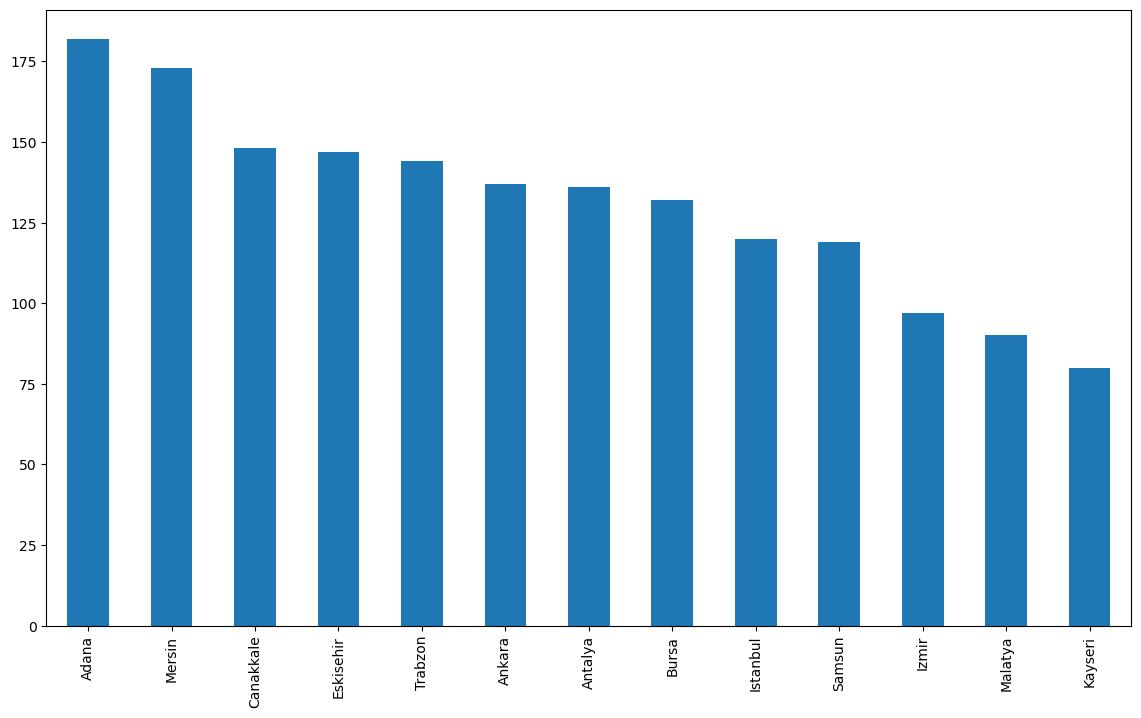

In [61]:
def plot_categorie_spread(df, col_name):
    df[col_name].value_counts().plot(kind="bar", figsize=(14,8))
    plt.show()

In [ ]:
for 